# Cropping potholes

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [79]:
data_path = 'ignore/testing/'
image_no = 1
for i in os.listdir(data_path):
    if not i.endswith('.csv'):
        continue
    df = pd.read_csv(data_path + i, names = ['Image_Path', 'potholes', 'Coordinates'])
    for value in tqdm(df.values):
        image_path = value[0]
        no_potholes = int(value[1])
        coordinates = value[2].split()
        n = 0
        for i in range(no_potholes):
            x, y, w, h = coordinates[n:n + 4]
            x, y, w, h = int(x) - 10, int(y) - 10, int(w) + 20, int(h) + 20
            
            n = n + 4
            image = cv2.imread(data_path + image_path)
            cropped = image[y:y + h, x:x + w]
            cv2.imwrite(data_path + 'dataset/' + str(image_no) + '.jpg', cropped)
            image_no += 1

100%|██████████| 1297/1297 [04:05<00:00,  9.43it/s]


# Checking Distribution

In [2]:
df = pd.read_csv('ignore/dataset/DataSet_Pothole - Sheet1.csv')
df.head()

,No.,Severity
0,1,1
1,2,2
2,3,1
3,4,1
4,5,1


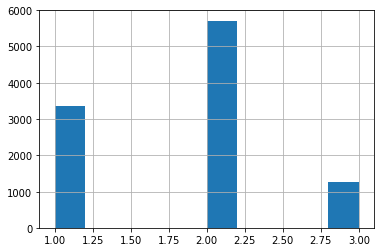

In [13]:
df['Severity'].hist()

# Checking min, max width and height

In [20]:
from tqdm import tqdm

min_height, min_width, max_height, max_width = 999, 999, 0, 0
min_height_shape, min_width_shape, max_height_shape, max_width_shape = (0, 0), (0, 0), (0, 0), (0, 0)
min_height_name, min_width_name, max_height_name, max_width_name = '', '', '', ''
for image in tqdm(os.listdir('ignore/dataset/dataset/')):
    try:
        i = cv2.imread('ignore/dataset/dataset/' + image, 0)
        shape = i.shape
        if min_height > shape[0]:
            min_height = shape[0]
            min_height_shape = shape
            min_height_name = image
        if min_width > shape[1]:
            min_width = shape[1]
            min_width_shape = shape
            min_width_name = image
        if max_height < shape[0]:
            max_height = shape[0]
            max_height_shape = shape
            max_height_name = image
        if min_width < shape[1]:
            min_width = shape[1]
            max_width_shape = shape
            max_width_name = image
    except Exception as e:
        pass
print(min_height, min_width, max_height, max_width)
print(min_height_shape, min_width_shape, max_height_shape, max_width_shape)
print(min_height_name, min_width_name, max_height_name, max_width_name)

100%|██████████| 10343/10343 [00:00<00:00, 10993.37it/s]

22 138 234 0
(22, 34) (46, 138) (234, 930) (60, 208)
10312.jpg 8406.jpg 8528.jpg 749.jpg


In [9]:
im = cv2.imread('ignore/dataset/dataset/8528.jpg')
cv2.imshow('title', im)
im = cv2.copyMakeBorder(im, 50, 50, 50, 50, cv2.BORDER_CONSTANT)
cv2.imshow('bordered', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
from tqdm import tqdm

In [14]:
for image_name in tqdm(os.listdir('ignore/dataset/dataset/')):
    try:
        image = cv2.imread('ignore/dataset/dataset/' + image_name)
        image = cv2.resize(image, (80, 40))
        cv2.imwrite('ignore/dataset/resized_dataset/' + image_name, image)
    except Exception as e:
        pass

100%|██████████| 10343/10343 [00:03<00:00, 2859.46it/s]


# Script for balancing the dataset

100%|██████████| 10335/10335 [00:05<00:00, 1753.47it/s]


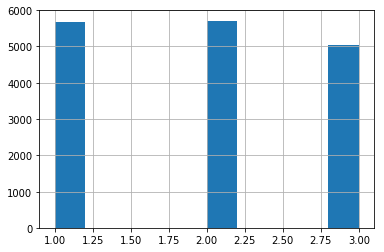

In [45]:
df = pd.read_csv('ignore/dataset/DataSet_Pothole - Sheet1.csv')
for image_name, severity in tqdm(df.values):
    try:
        image = cv2.imread('ignore/dataset/dataset/' + str(image_name) + '.jpg')
        shape = image.shape
        image = cv2.resize(image, (80, 40))
        if severity == 1:
            with open('ignore/dataset/balanced.csv', 'a+') as file:
                file.write('\n' + str(image_name) + '.jpg, ' + str(severity))
            cv2.imwrite('ignore/dataset/balanced/' + str(image_name) + '.jpg', image)
            if shape[0] > 35 or shape[1] > 70:
                both = cv2.flip(image, -1)
                with open('ignore/dataset/balanced.csv', 'a+') as file:
                    file.write('\n' + str(image_name) + '_flipped.jpg, ' + str(severity))
                cv2.imwrite('ignore/dataset/balanced/' + str(image_name) + '_flipped.jpg', both)
        else:
            with open('ignore/dataset/balanced.csv', 'a+') as file:
                file.write('\n' + str(image_name) + '.jpg, ' + str(severity))
            cv2.imwrite('ignore/dataset/balanced/' + str(image_name) + '.jpg', image)
            if severity == 3:
                horizontal_img = cv2.flip(image, 0)
                with open('ignore/dataset/balanced.csv', 'a+') as file:
                    file.write('\n' + str(image_name) + '_horizontal.jpg, ' + str(severity))
                cv2.imwrite('ignore/dataset/balanced/' + str(image_name) + '_horizontal.jpg', horizontal_img)
                vertical = cv2.flip(image, 1)
                with open('ignore/dataset/balanced.csv', 'a+') as file:
                    file.write('\n' + str(image_name) + '_vertical.jpg, ' + str(severity))
                cv2.imwrite('ignore/dataset/balanced/' + str(image_name) + '_vertical.jpg', vertical)
                both = cv2.flip(image, -1)
                with open('ignore/dataset/balanced.csv', 'a+') as file:
                    file.write('\n' + str(image_name) + '_flipped.jpg, ' + str(severity))
                cv2.imwrite('ignore/dataset/balanced/' + str(image_name) + '_flipped.jpg', both)
    except Exception as e:
        pass
df = pd.read_csv('ignore/dataset/balanced.csv')
df.Severity.hist()

# Flipping the Image

In [36]:
image = cv2.imread('ignore/dataset/dataset/8528.jpg')
cv2.imshow('image', image)
horizontal_img = cv2.flip( image, 0 )
cv2.imshow('flipped', horizontal_img)
vertical = cv2.flip( image, 1 )
cv2.imshow('vert flipped', vertical)
both = cv2.flip( image, -1 )
cv2.imshow('both flipped', both)
cv2.waitKey(0)
cv2.destroyAllWindows()